In [14]:
import pandas as pd
import scipy.stats as stats
import statistics as stat
import numpy as np
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
len(df)

891

In [15]:
#Преобразование 
#1 - столбец пол в цифровой формат
df = pd.get_dummies (df, columns=['Sex'], drop_first= True )

#2 колонки без возраста убираю
df = df.dropna(subset=['Age'])
len(df)

714

In [17]:
#Определяю колонки от которых зависит выживаемость
features = ['Age', 'Sex_male', 'Pclass', 'SibSp', 'Parch']
x_df = df[features]
x_df

,Age,Sex_male,Pclass,SibSp,Parch
0,22.0,1,3,1,0
1,38.0,0,1,1,0
2,26.0,0,3,0,0
3,35.0,0,1,1,0
4,35.0,1,3,0,0
...,...,...,...,...,...
885,39.0,0,3,0,5
886,27.0,1,2,0,0
887,19.0,0,1,0,0
889,26.0,1,1,0,0


In [18]:
#Ожидаемый результат
y_df = df['Survived']
y_df

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

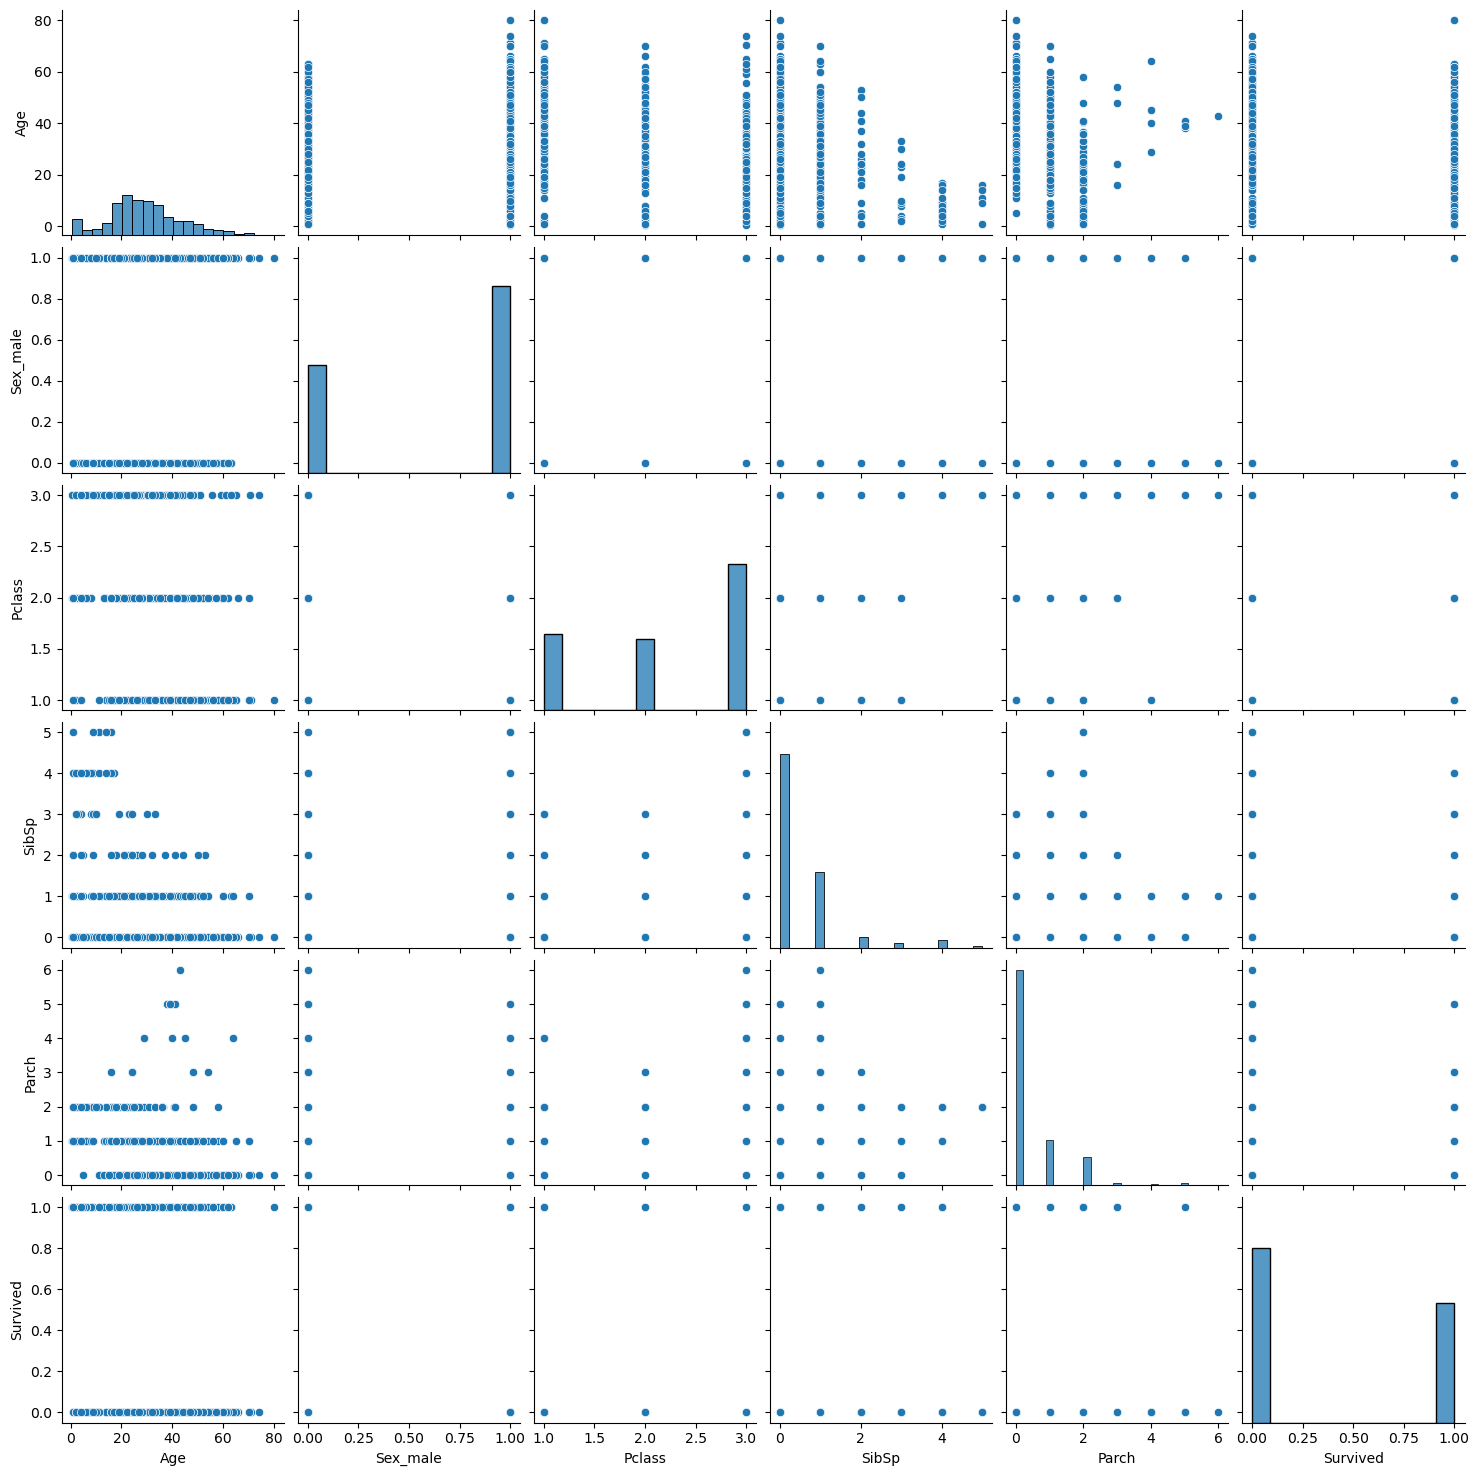

In [19]:
import seaborn as sns
full_df = pd.concat([x_df, y_df], axis=1)
sns.pairplot(full_df)

In [20]:
#Разбиваю данные на группы test, train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8, random_state=0)

In [21]:
#обучение модели
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#accuracy

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8601398601398601